In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#extract date and time
def date_time(s):
    pattern = '\d{1,2}\/\d{1,2}\/\d{2},\s\d{1,2}:\d{2}\s(?:AM|PM)\s-\s'
    result = re.match(pattern,s)
    if  result:
        return True
    return False

#extract contacts
def find_contact(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    

#extract message
def getMessage(line):
    splitline = line.split(" - ")
    datetime = splitline[0]
    date, time = datetime.split(', ')
    message = " ".join(splitline[1:])

    if find_contact(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = splitmessage[1]
    else:
        author = None
    return date, time, author, message

In [3]:
data = []
conversation = "WhatsApp Chat with Sec-A UNOFFICIAL.txt"
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer)>0:
                data.append([date, time, author , " ".join(messageBuffer)])
                messageBuffer.clear()
                date, time, author, message = getMessage(line)
                messageBuffer.append(message)
            else:
                messageBuffer.append(line)

In [4]:
df = pd.DataFrame(data, columns=["Date", "Time", "Contact", "Message"])
df['Date']=pd.to_datetime(df["Date"])

df

,Date,Time,Contact,Message
0,NaT,None,None,"11/9/22, 11:56 PM - Shresth Jain (MSI): This m..."
1,2022-11-09,11:59 PM,Pratham (MSI),*PAYMENT PROCESS*
2,2022-11-09,11:59 PM,Pratham (MSI),<Media omitted>
3,2022-11-09,11:59 PM,Pratham (MSI),*𝐻𝑒𝓎 𝐹𝓇𝑒𝓈𝒽𝑒𝓇𝓈’𝓈* ❤️‍🔥
4,2022-11-10,4:26 PM,+91 91494 33863,Kal college h na?
...,...,...,...,...
9170,2023-08-06,12:39 PM,Akshit Kakran (MSI),bro be like ja na lwde khelne de
9171,2023-08-06,12:39 PM,+91 88511 20584,Bsdka feature bata rha tha 😭
9172,2023-08-06,12:40 PM,Akshit Kakran (MSI),😭😭
9173,2023-08-06,12:40 PM,Akshit Kakran (MSI),bhai khelne de na feature gend m lele


In [5]:
words = []
for message in df["Message"]:
    words.extend(message.split())

len(words)
print(words)

['11/9/22,', '11:56', 'PM', '-', 'Shresth', 'Jain', '(MSI):', 'This', 'message', 'was', 'deleted', '*PAYMENT', 'PROCESS*', '<Media', 'omitted>', '*𝐻𝑒𝓎', '𝐹𝓇𝑒𝓈𝒽𝑒𝓇𝓈’𝓈*', '❤️\u200d🔥', 'Kal', 'college', 'h', 'na?', 'Yes', 'Kisi', 'ne', 'HVE', 'ka', 'assignment', 'kra', 'ha', 'kya?', 'Kl', 'period', 'thodi', 'h', 'Friday', 'ko', 'nhi', 'hota', 'kya?', 'Na', 'ab', 'Saturday', 'ko', 'hoga', 'Tt', 'change', 'hogya', 'Ok', 'bro', 'Fir', 'kb', 'krega', 'bhai', '😂', 'Konsa', 'assignment', 'This', 'message', 'was', 'deleted', 'Assignment', '2', 'bhai', 'HVE', 'ka', 'assignment', '1', 'kab', 'aaya', 'Kl', 'Krke', 'bhej', 'diyo', '+1', '<Media', 'omitted>', 'Ye', 'rha', 'assignment', 'question', 'ab', 'krke', 'bhej', 'dena', 'Ye', 'submit', 'kab', 'krna', 'saturday', 'Abhi', 'to', 'bahut', 'time', 'h', 'aise', 'krlo', 'Bhai', 'break', 'ke', 'baad', 'bhi', 'python', 'ki', 'class', 'h?', 'Lab', 'c++', 'Hori', 'abhi', 'lab?', 'Yas', 'No', 'Yas', 'Noooo', 'Lab', '1', 'ghnte', 'ki', 'h', '?', 'Hn', '<Med

In [6]:
from urlextract import URLExtract
extractor = URLExtract()
links=[]

for message in df["Message"]:
    links.extend(extractor.find_urls(message))

len(links)

75

In [7]:
round((df['Contact'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = ({"index":'Name',"Contact":"Percent"}))

,Name,Percent
0,+91 88511 20584,12.20
1,Shresth Jain (MSI),9.36
2,Moksh Verma (MSI),9.04
3,Akshit Kakran (MSI),8.62
4,+91 91494 33863,7.55
5,Yash Singh Verma (MSI),6.47
6,Ansh Shokeen (MSI),5.44
7,Riddhima (MSI),3.99
8,Pryansh (MSI),3.63
9,+91 85859 52650,3.39


In [8]:
temp = df["Message"]!= "<Media omitted"

In [9]:
words = []
for message in df["Message"]:
    words.extend(message.split())

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,hai,924
1,<Media,852
2,omitted>,852
3,h,523
4,bhai,389
5,Bhai,361
6,nhi,352
7,to,349
8,se,339
9,ka,320


In [10]:
import emoji
emojis = []
for message in  df['Message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,515
1,💀,345
2,🥳,175
3,😭,126
4,🤣,107
...,...,...
183,🎓,1
184,✴,1
185,🎽,1
186,💵,1


In [11]:
daily_timeline = df.groupby(["Date"]).count()["Message"].reset_index()
daily_timeline

,Date,Message
0,2022-11-09,3
1,2022-11-10,23
2,2022-11-11,9
3,2022-11-12,22
4,2022-11-13,8
...,...,...
233,2023-07-25,1
234,2023-07-29,11
235,2023-08-01,3
236,2023-08-03,1


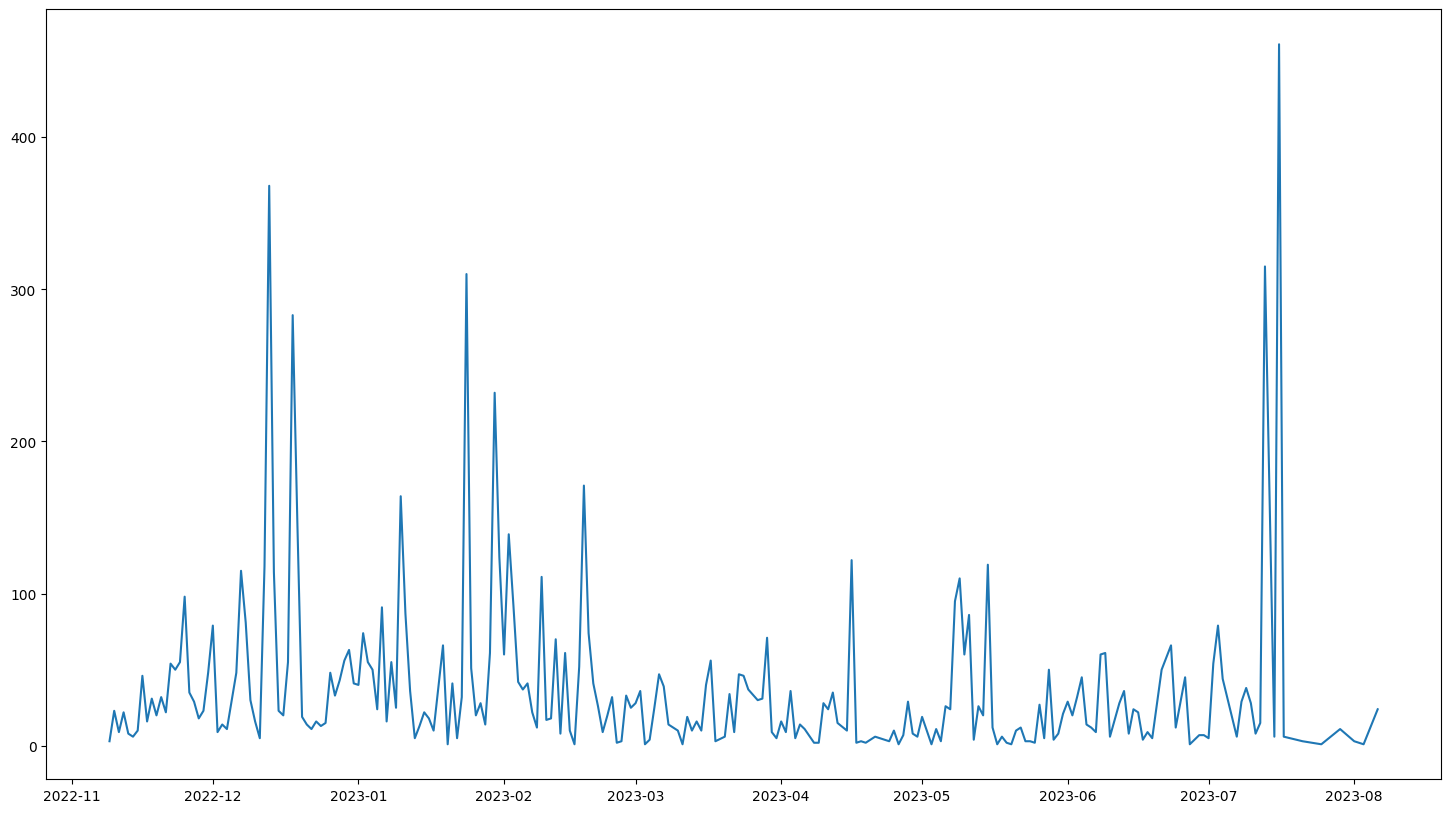

In [12]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline["Date"],daily_timeline["Message"])

In [13]:
df["Month"]=df["Date"].dt.month_name()
df["Year"]=df["Date"].dt.year

In [14]:
monthly_timeline = df.groupby(["Month","Year"]).count()["Message"].reset_index()
monthly_timeline

,Month,Year,Message
0,April,2023.0,406
1,August,2023.0,28
2,December,2022.0,1907
3,February,2023.0,1229
4,January,2023.0,1770
5,July,2023.0,1109
6,June,2023.0,612
7,March,2023.0,684
8,May,2023.0,771
9,November,2022.0,658


In [15]:
time = []
for i in range(monthly_timeline.shape[0]):
    time.append(monthly_timeline['Month'][i] + "-" + str(monthly_timeline['Year'][i]))

monthly_timeline['Time'] = time
monthly_timeline

,Month,Year,Message,Time
0,April,2023.0,406,April-2023.0
1,August,2023.0,28,August-2023.0
2,December,2022.0,1907,December-2022.0
3,February,2023.0,1229,February-2023.0
4,January,2023.0,1770,January-2023.0
5,July,2023.0,1109,July-2023.0
6,June,2023.0,612,June-2023.0
7,March,2023.0,684,March-2023.0
8,May,2023.0,771,May-2023.0
9,November,2022.0,658,November-2022.0


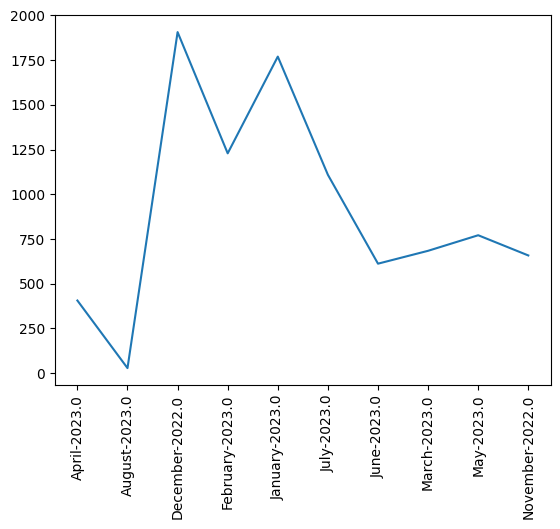

In [16]:
plt.plot(monthly_timeline["Time"],monthly_timeline["Message"])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot: xlabel='Month', ylabel='Message'>

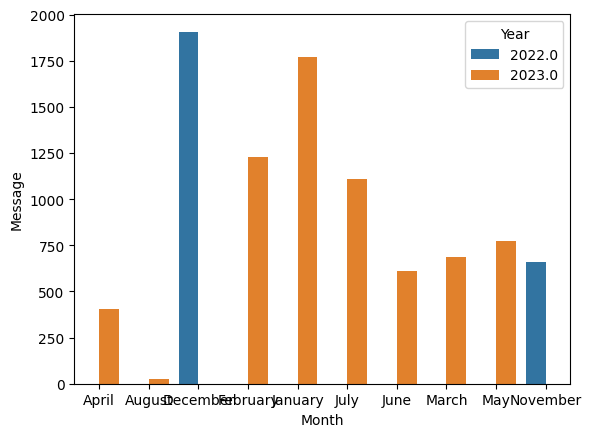

In [17]:
import seaborn as sns
sns.barplot(x = 'Month', y = 'Message', data = monthly_timeline , hue = 'Year')

In [19]:
df["Day_name"]=df["Date"].dt.day_name()

df["Day_name"].value_counts()

Tuesday      1752
Sunday       1668
Monday       1478
Thursday     1467
Wednesday    1064
Friday        968
Saturday      777
Name: Day_name, dtype: int64

In [20]:
df["Month"].value_counts()

December    1907
January     1770
February    1229
July        1109
May          771
March        684
November     658
June         612
April        406
August        28
Name: Month, dtype: int64